In [19]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [20]:
games = pd.read_csv("C:/Users/Administrator/vgsales.csv")
#games = pd.DataFrame(games)
games.columns = [i.lower() for i in games.columns]
#删掉重复行
games = games.drop_duplicates()
print("Dataset shape:",games.shape)

Dataset shape: (16598, 11)


In [21]:
games.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
#删除带有Na值的行
games.dropna(how = "any",inplace = True)
print("Dataset shape after droping row's with na:",games.shape)

Dataset shape after droping row's with na: (16291, 11)


In [23]:
#将年份转为int型
games.year = games.year.astype(int)

In [24]:
#最受欢迎的游戏
max_sold = games.global_sales.max()
print("game got highest global sales : ") 
name = games[games.global_sales == max_sold][["name","global_sales"]]
name

game got highest global sales : 


,name,global_sales
0,Wii Sports,82.74


Text(0.5, 1.0, 'Year wise global game sales :')

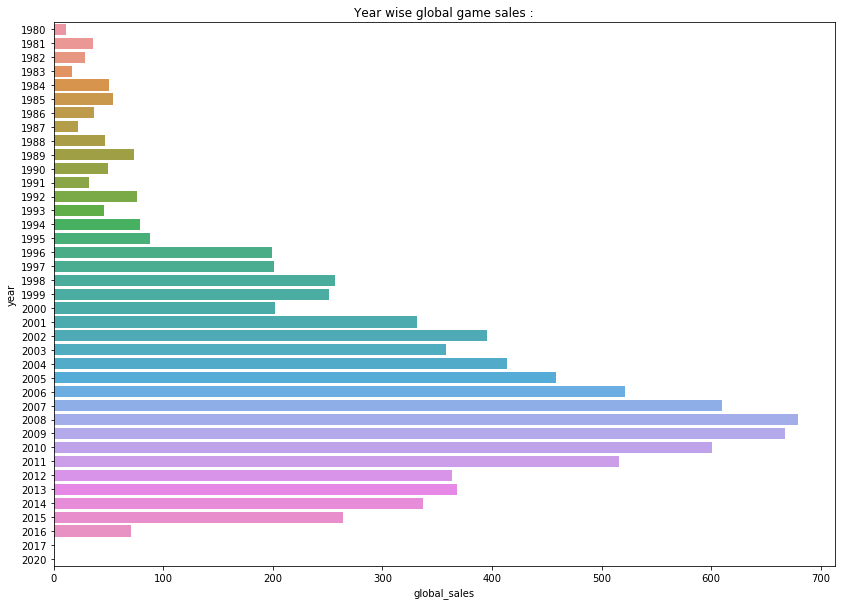

In [25]:
#年度全球游戏销量
plt.rcParams['figure.figsize'] = (14,10)
year_wise_game_sales  = pd.pivot_table(games ,index = "year" ,values = "global_sales",aggfunc = np.sum)
sns.barplot(year_wise_game_sales["global_sales"],year_wise_game_sales.index,orient = "h")
plt.title("Year wise global game sales :")

Text(0.5, 1.0, 'Top 10 Genre wise global game sales :')

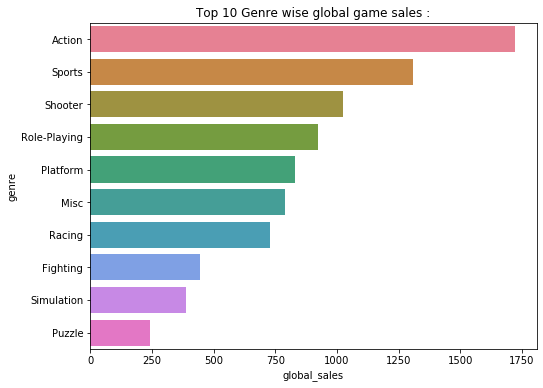

In [26]:
#最受欢迎的类型
plt.rcParams['figure.figsize'] = (8,6)
genre_wise_game_sales = pd.pivot_table(games,index="genre",values="global_sales",aggfunc=np.sum)
genre_wise_game_sales = genre_wise_game_sales.sort_values(by = "global_sales",ascending = False).head(10)
sns.barplot(genre_wise_game_sales["global_sales"],genre_wise_game_sales.index,orient="h",palette="husl")
plt.title("Top 10 Genre wise global game sales :")

Text(0.5, 1.0, 'Top 10 Platform wise global game sales :')

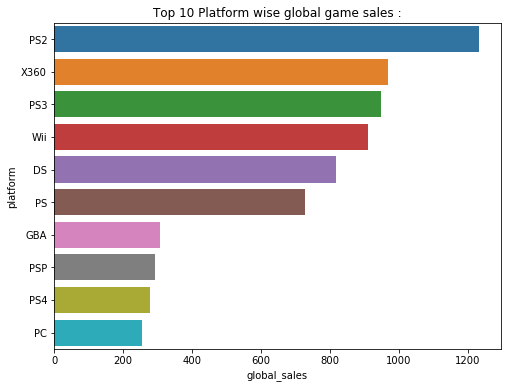

In [27]:
#最受欢迎的发布平台
plt.rcParams['figure.figsize'] = (8,6)
platform_wise_game_sales  = pd.pivot_table(games ,index = "platform" ,values = "global_sales",aggfunc = np.sum)
platform_wise_game_sales  = platform_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(10)
sns.barplot(platform_wise_game_sales["global_sales"],platform_wise_game_sales.index,orient = "h")
plt.title("Top 10 Platform wise global game sales :")

Text(0.5, 1.0, 'Top 10 Publisher wise global game sales :')

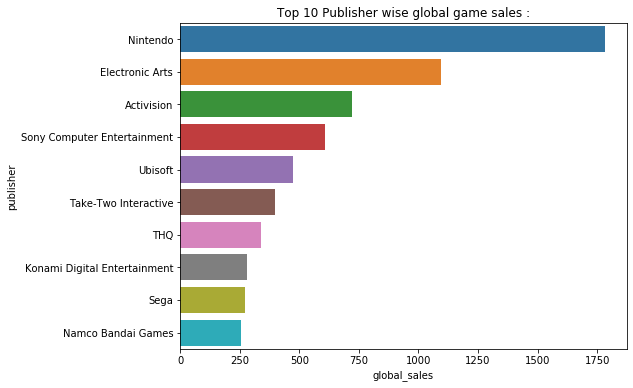

In [28]:
#最受欢迎的发行人
plt.rcParams['figure.figsize'] = (8,6)
platform_wise_game_sales  = pd.pivot_table(games ,index = "publisher" ,values = "global_sales",aggfunc = np.sum)
platform_wise_game_sales  = platform_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(10)
sns.barplot(platform_wise_game_sales["global_sales"],platform_wise_game_sales.index,orient = "h")
plt.title("Top 10 Publisher wise global game sales :")

Text(0, 0.5, 'avg global_sales')

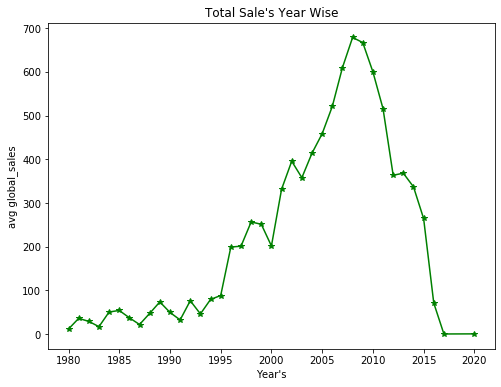

In [29]:
#根据每年的销售额预测
tot_sales_year_wise = pd.pivot_table(games,index = "year",values = "global_sales",aggfunc= np.sum)
plt.plot(tot_sales_year_wise.index,tot_sales_year_wise["global_sales"],color = 'g',marker = "*")
plt.title("Total Sale's Year Wise")
plt.xlabel("Year's")
plt.ylabel("avg global_sales")

In [38]:
from sklearn.preprocessing import LabelEncoder
# categorical_labels = ['Platform','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales']
categorical_labels = ['platform','genre','publisher']
numerical_lables = ['global_sales']
enc = LabelEncoder()
encoded_df = pd.DataFrame(columns=['platform','genre','publisher','global_sales'])

for label in categorical_labels:
    temp_column = games[label]
    encoded_temp_col = enc.fit_transform(temp_column)
    encoded_df[label] = encoded_temp_col

for label in numerical_lables:
    encoded_df[label] = games[label].values

encoded_df.head()

,platform,genre,publisher,global_sales
0,26,10,359,82.74
1,11,4,359,40.24
2,26,6,359,35.82
3,26,10,359,33.00
4,5,7,359,31.37


In [46]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(encoded_df, test_size=0.1, random_state=1)

def data_splitting(games):
    x=games.drop(['global_sales'], axis=1)
    y=games['global_sales']
    return x, y

x_train, y_train = data_splitting(train)
x_test, y_test = data_splitting(test)

In [47]:
#使用随机森林预测
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200,min_samples_split=20,random_state=43)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
n = len(x_test)
p = x_test.shape[1]
r2_value = r2_score(y_test,y_pred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
print("r2_score for Random Forest Reg model : ",r2_score(y_test,y_pred))
print("adjusted_r2_score Value              : ",adjusted_r2_score)
print("MSE for Random Forest Regression     : ",mean_squared_error(y_test,y_pred))

r2_score for Random Forest Reg model :  0.13590411898436794
adjusted_r2_score Value              :  0.1343098461411657
MSE for Random Forest Regression     :  2.50019658845997
